# Name : YUKTA VAJPAYEE

        

# TASK 2:TO EXPLORE THE SUPERVISED LEARNING
In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
link="http://bit.ly/w-data"
data=pd.read_csv(link)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1, 'PLOT BETWEEN SCORES Vs HOURS')

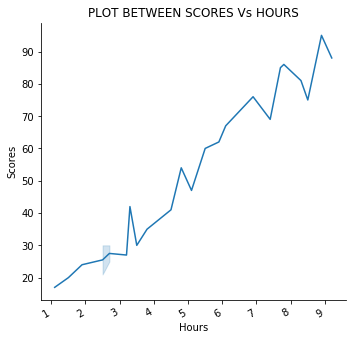

In [14]:
g = sns.relplot(x="Hours", y="Scores", kind="line", data=data)
g.fig.autofmt_xdate()
plt.title('PLOT BETWEEN SCORES Vs HOURS')

In [20]:
from sklearn.model_selection import train_test_split

X =  data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [21]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print('Root mean Score Training: {}'.format(r2_score(y_train, pred_train)))
print('Root mean Score Testing: {}'.format(r2_score(y_test, pred_test)))

Root mean Score Training: 0.9874565343905721
Root mean Score Testing: 0.8378649386084585


In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

1.87090421597631


In [24]:
new = pd.Series(list(y_test)).values
new_list =[]
for i in range(len(new)):
    new_list.insert(i,new[i])
new_list = [float(q) for q in new_list]
new_list = [round(q) for q in new_list]
pred_test = [float(q) for q in pred_test]
pred_test = [round(q) for q in pred_test]

In [25]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer/denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return(a,b)
a, b = best_fit(new_list, pred_test)

best fit line:
y = -7.43 + 1.17x


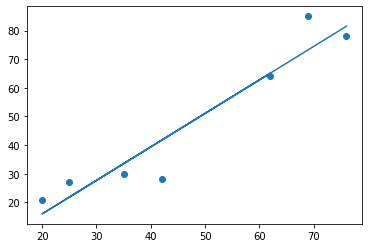

In [26]:
plt.scatter(new_list, pred_test)
yfit = [a + b * xi for xi in new_list]
plt.plot(new_list, yfit)

In [27]:
print(X_test) # Testing data - In Hours
y_pred = lm.predict(X_test) # Predicting the scores

[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]
 [7.4]
 [6.9]]


In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,25,28.477237
1,35,39.316855
2,42,34.389756
3,62,60.010669
4,20,16.652200
5,69,74.791966
6,76,69.864867


In [31]:
hours = [[9.25]]
new_pred = lm.predict(hours)
print("the predicted score is: {}".format(new_pred))

the predicted score is: [93.02223095]


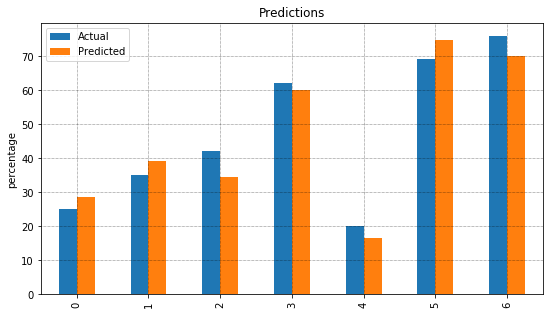

In [32]:
df.plot(kind='bar', figsize=(9,5))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('percentage')
plt.title('Predictions')
plt.show()